####  Analyze and Predict the Presence of Heart Disease 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') #they supress harmless warning..

In [11]:
data=pd.read_csv("/home/unnati-tripathi/Downloads/Artificial_Intelligence/heart.csv")

In [12]:
# 
data.head()
#quick preview

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# it shows that there are 14 feilds

In [13]:
data.info() #quick summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()
#all  the values are false/0 that means there is no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

data.columns

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
import seaborn as sns

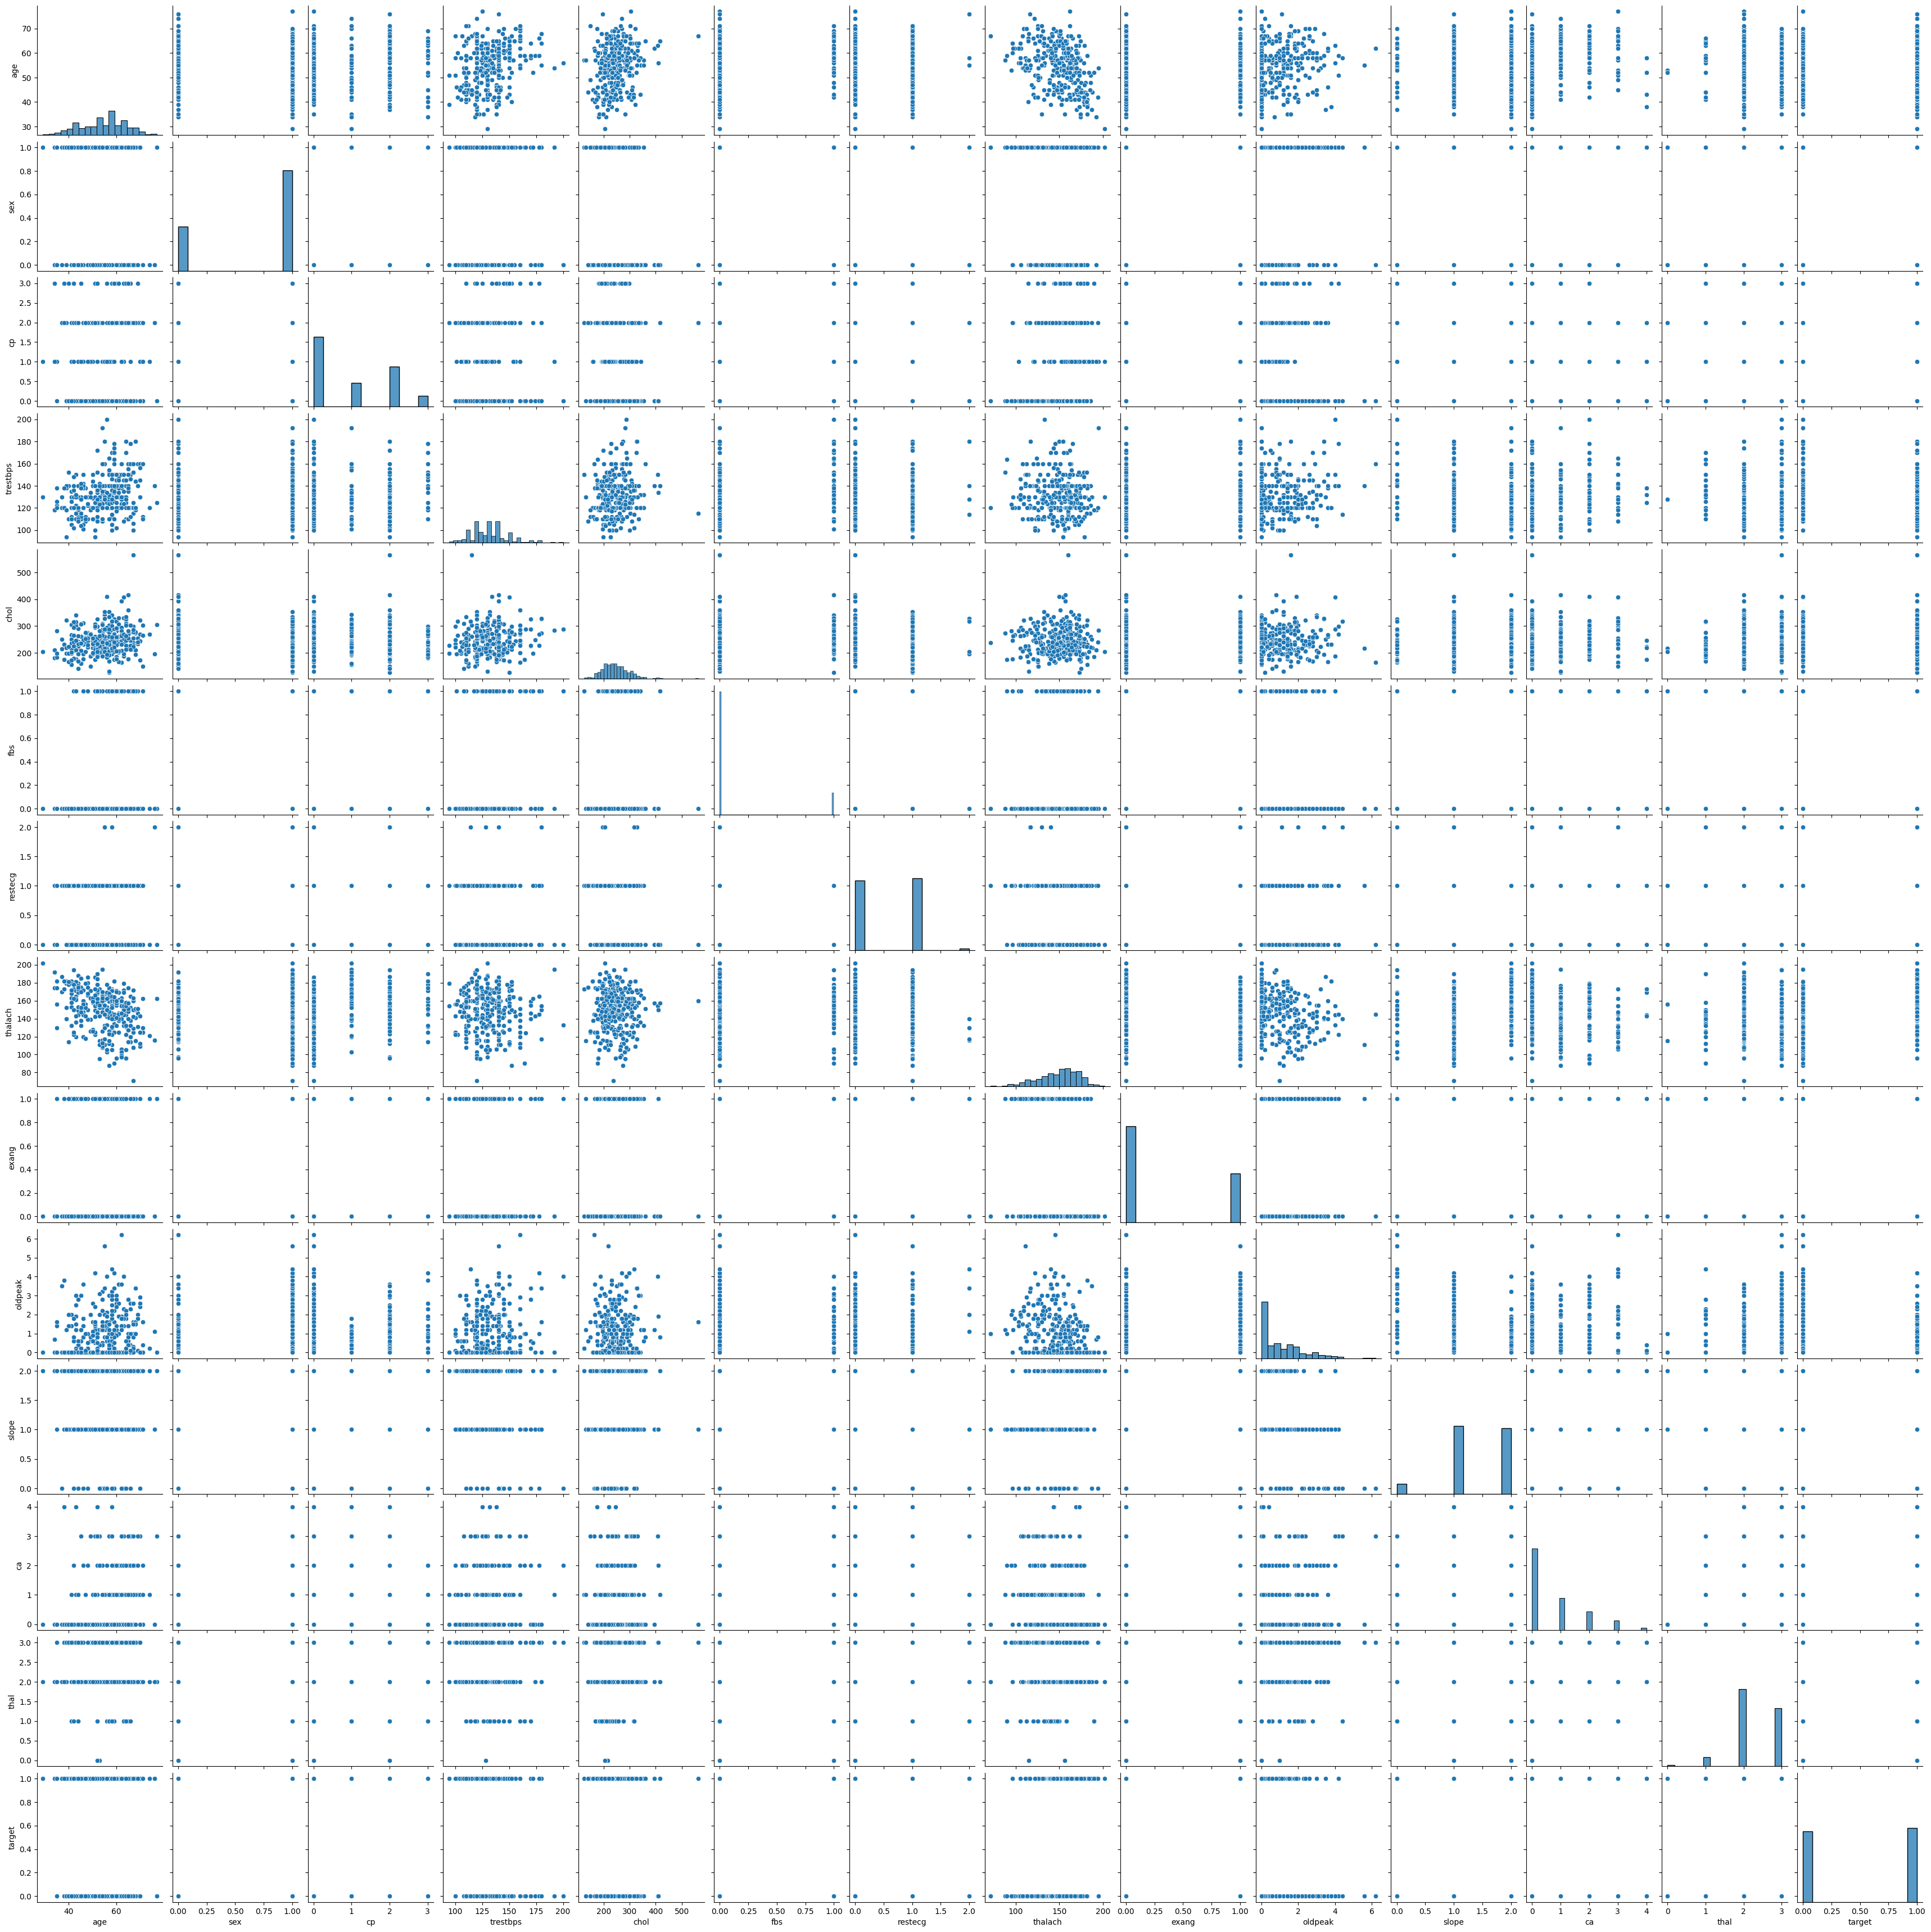

In [16]:
sns.pairplot(data)
plt.show()

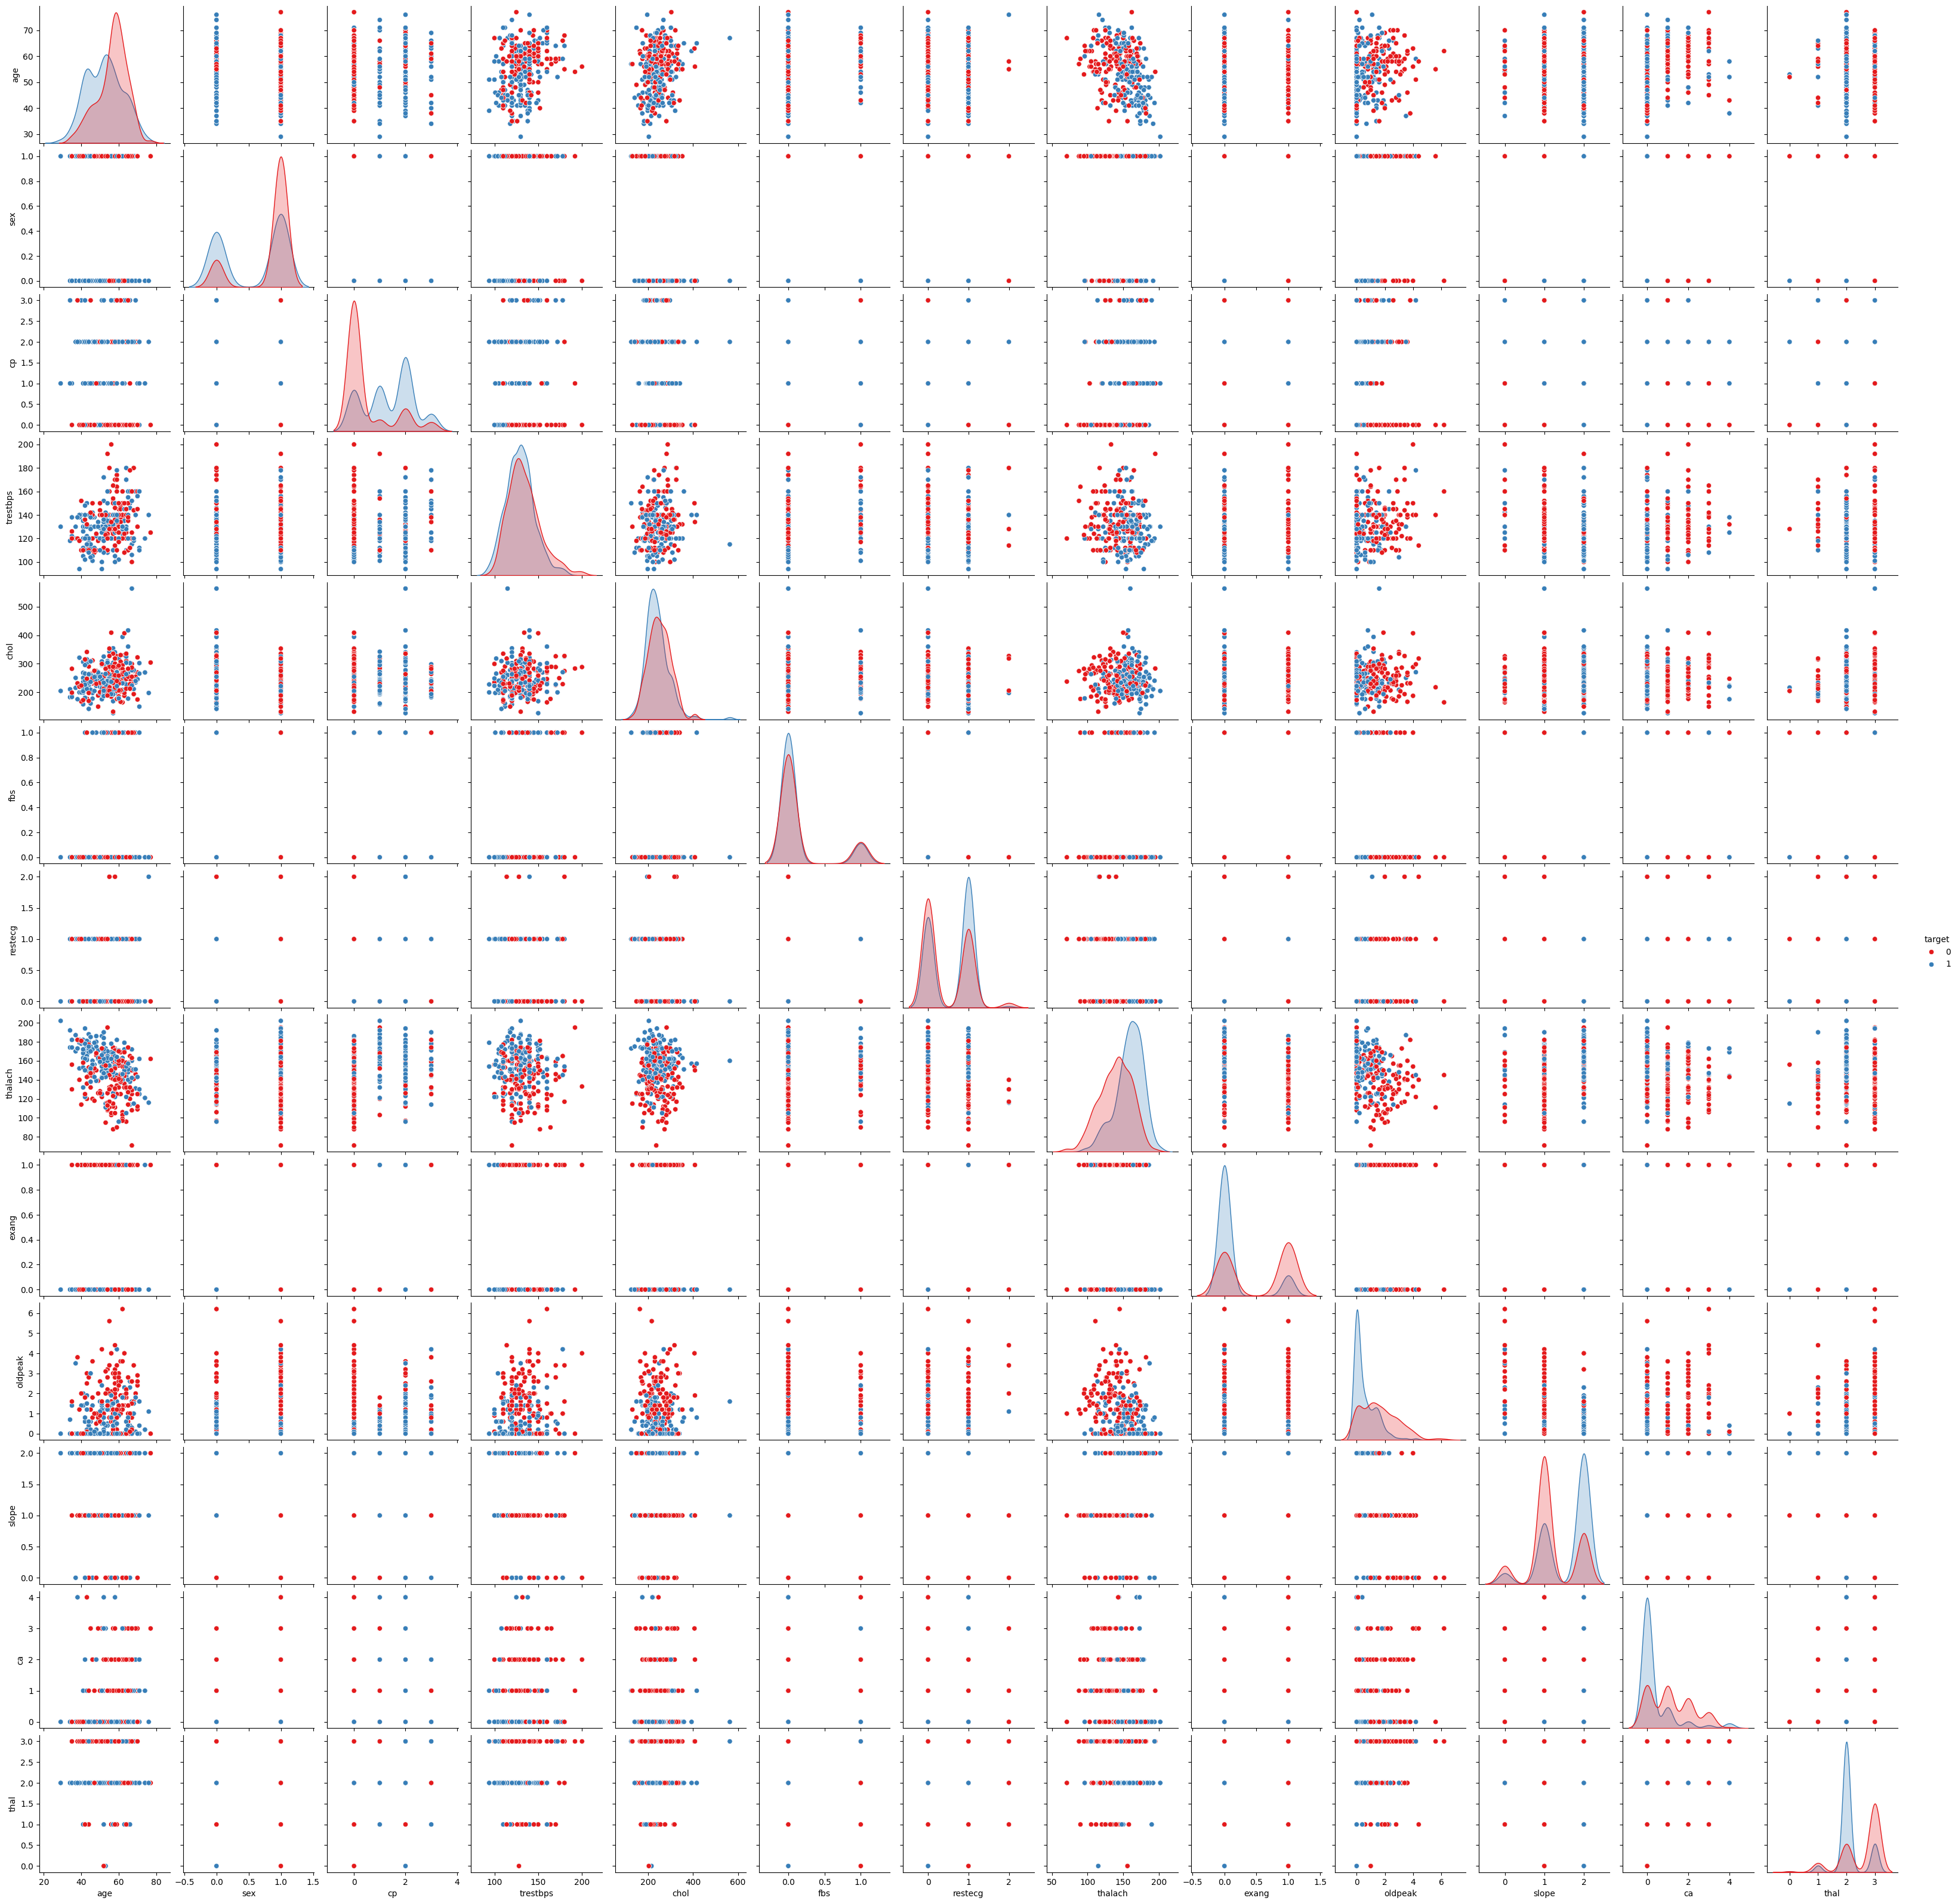

In [5]:
sns.pairplot(data, hue='target', palette='Set1')
plt.show()

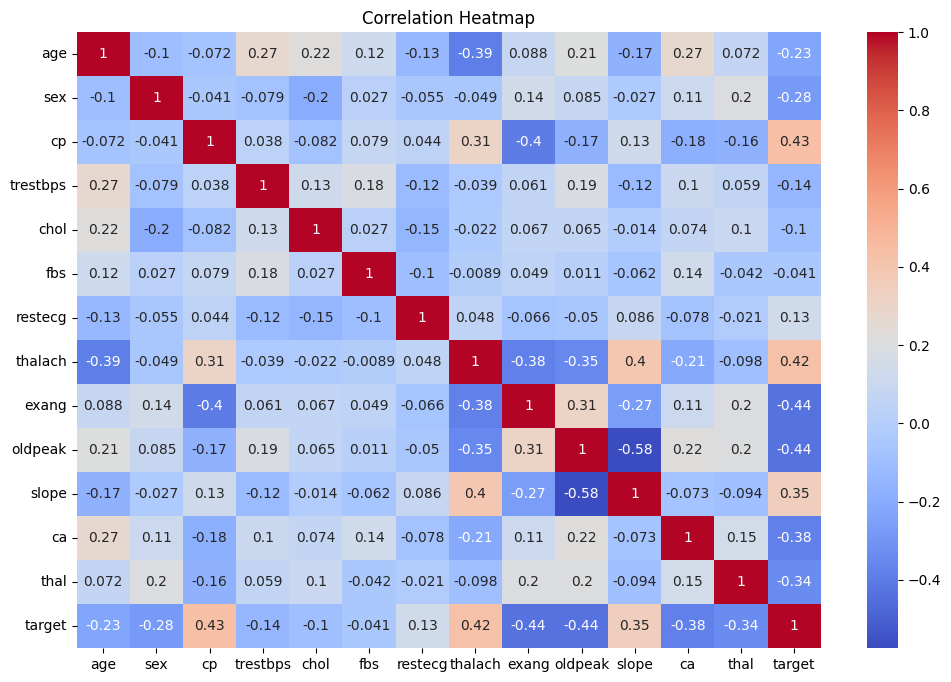

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#helps identify which features are most related to the target
#higher the correlation fefines that on high value of that high chace of getting heart desease

In [26]:

#feature-feature correlations exceed ±0.75, so multicollinearity is low.

In [18]:
categorical_features = [col for col in data.columns 
                        if data[col].dtype == 'object' or data[col].nunique() <= 10]
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
#draw bar plot for them

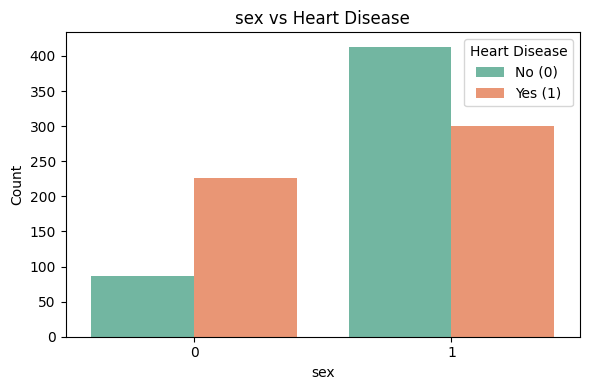

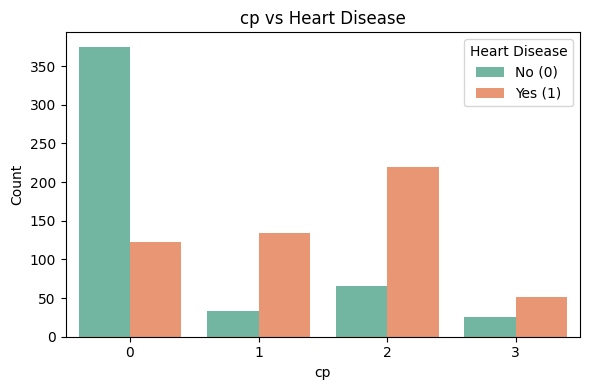

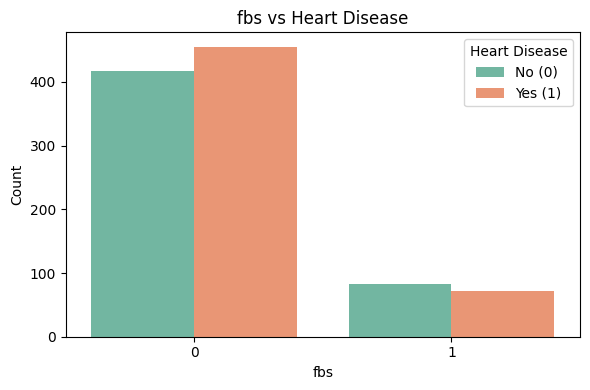

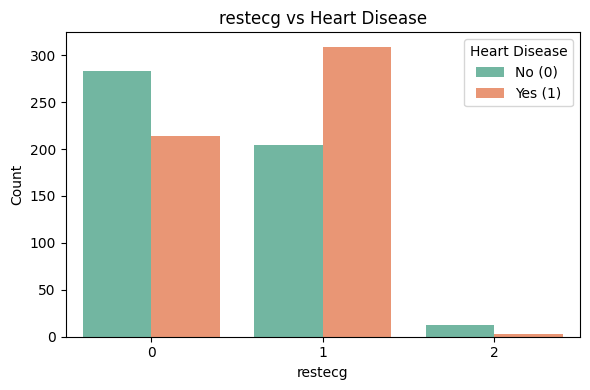

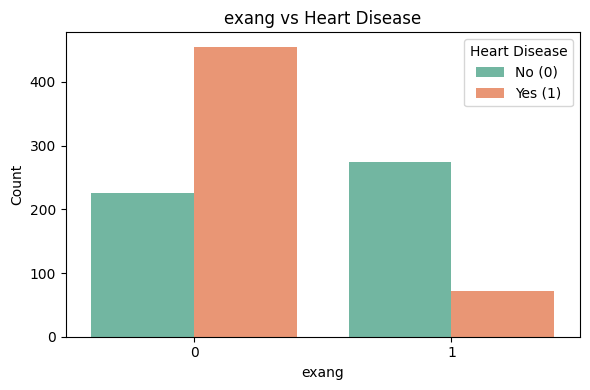

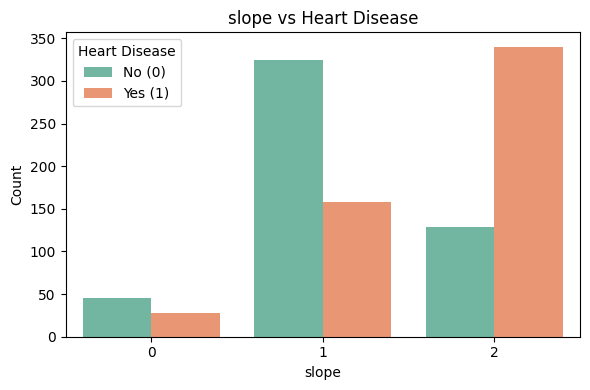

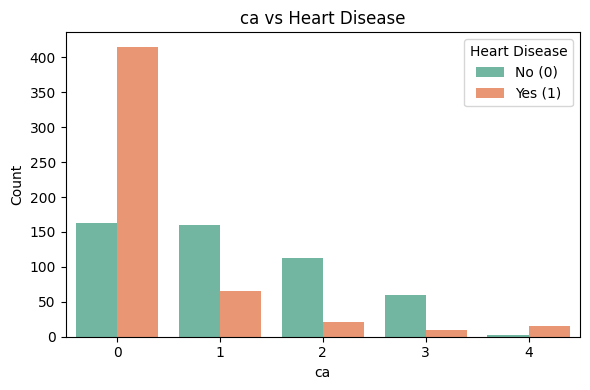

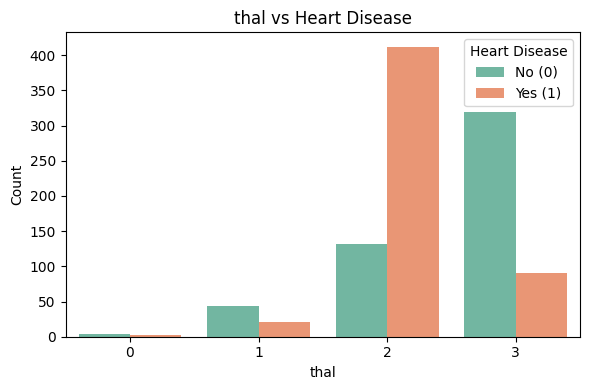

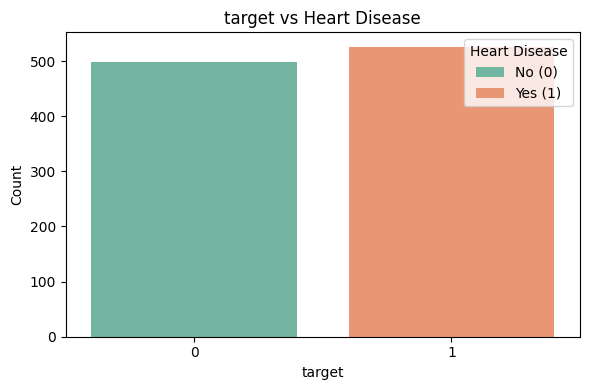

In [19]:
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='target', data=data, palette='Set2')
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
    plt.tight_layout() #spacing between subplots
    plt.show()

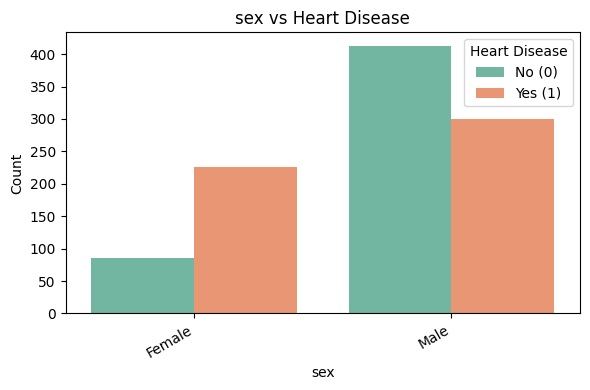

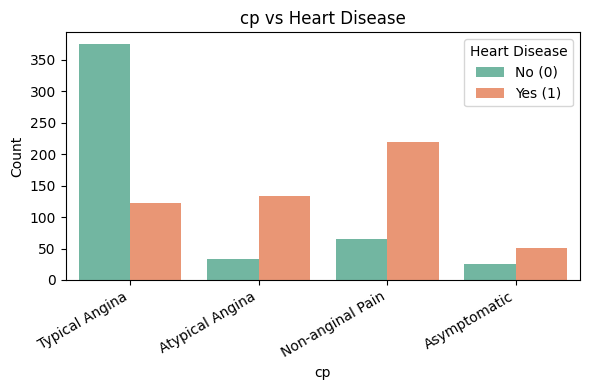

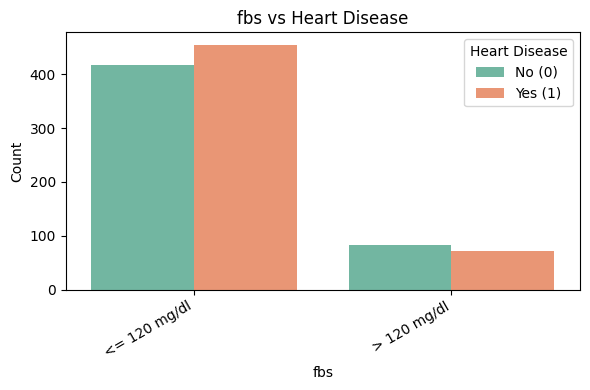

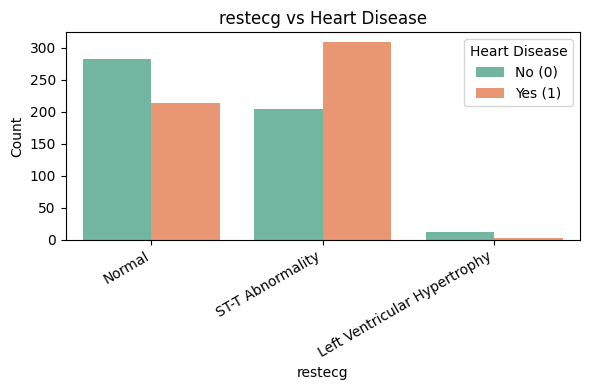

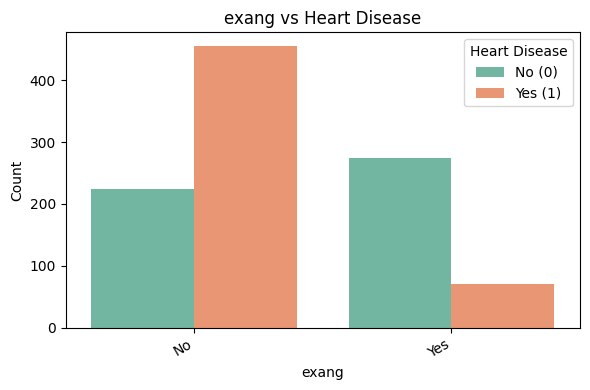

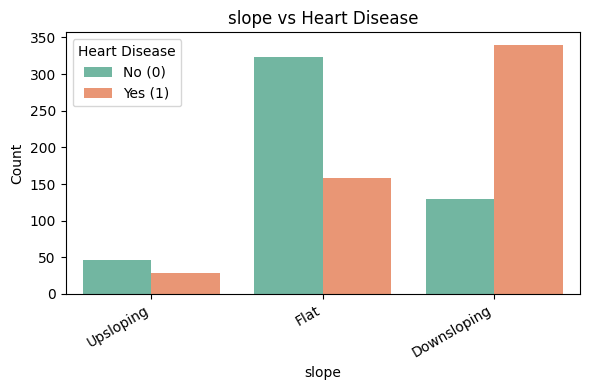

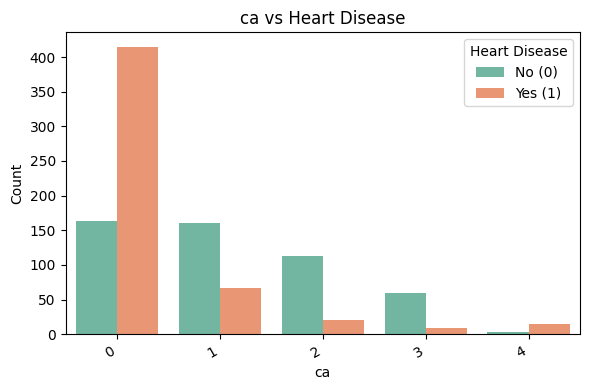

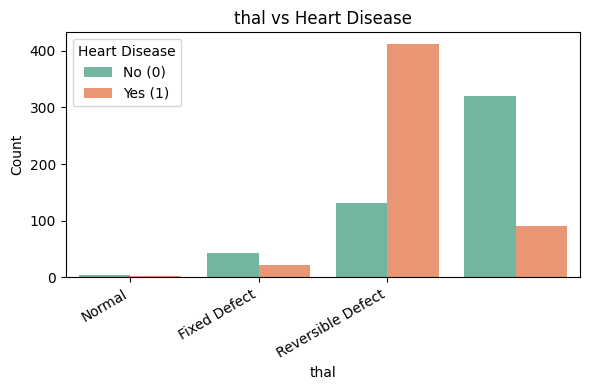

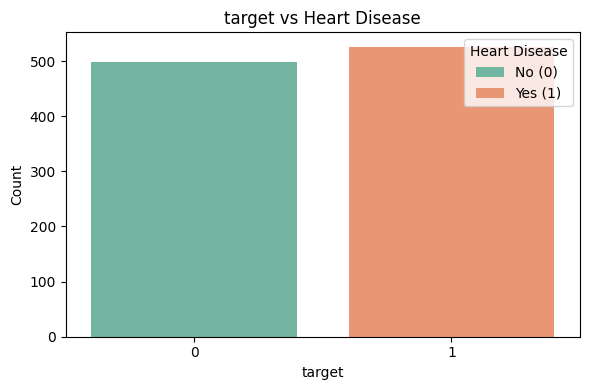

In [24]:


x_labels_dict = {
    'sex': ['Female', 'Male'],
    'cp': ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'],
    'fbs': ['<= 120 mg/dl', '> 120 mg/dl'],
    'restecg': ['Normal', 'ST-T Abnormality', 'Left Ventricular Hypertrophy'],
    'exang': ['No', 'Yes'],
    'slope': ['Upsloping', 'Flat', 'Downsloping'],
    'ca': ['0', '1', '2', '3', '4'],
    'thal': ['Normal', 'Fixed Defect', 'Reversible Defect']
}

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, hue='target', data=data, palette='Set2')
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])

    # Apply custom labels if available
    if feature in x_labels_dict:
        ax.set_xticks(range(len(x_labels_dict[feature])))
        ax.set_xticklabels(x_labels_dict[feature], rotation=30, ha='right')

    plt.tight_layout()
    plt.show()


In [20]:
numerical_features = [col for col in data.columns 
                      if col not in categorical_features + ['target'] and data[col].dtype in ['int64', 'float64']]

print("Numerical Features:", numerical_features)


Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


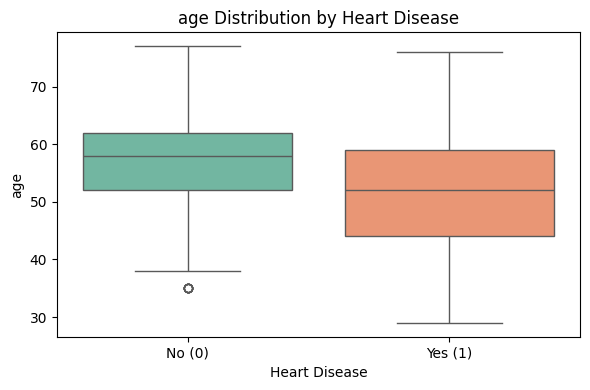

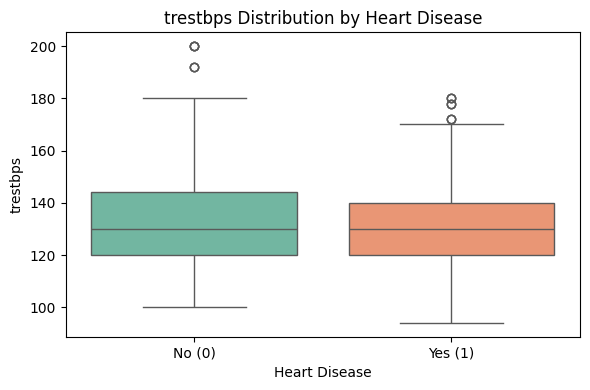

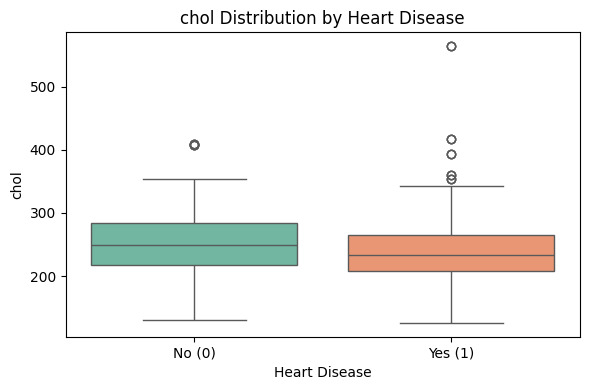

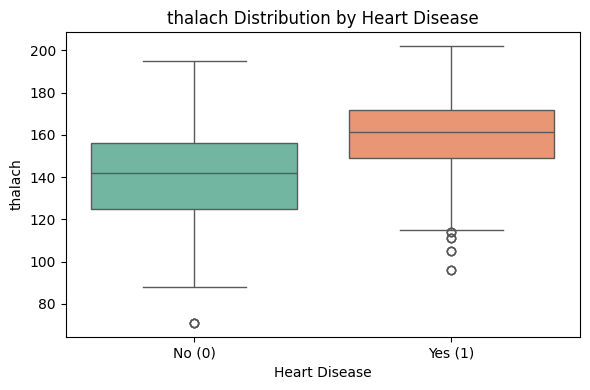

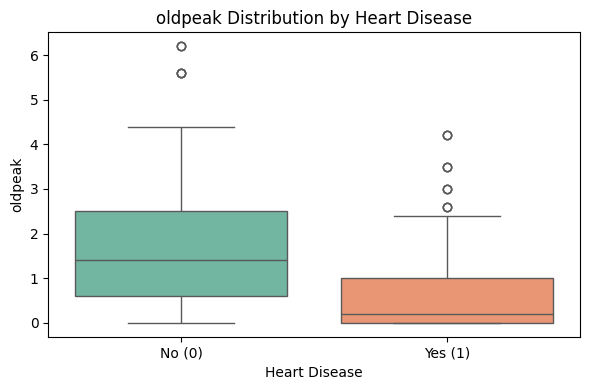

In [21]:


# Plot boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} Distribution by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
    plt.tight_layout()
    plt.show()


In [28]:
print('target' in categorical_features) 
    

True


In [22]:
categorical_features = [col for col in categorical_features if col != 'target']

In [40]:
# data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# # Now target is still intact
# X = data_encoded.drop('target', axis=1)
# y = data_encoded['target']


In [23]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
#You reduce redundancy and multicollinearity

# Separate features and label
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Normalize numeric data (optional but helpful for Logistic Regression, KNN)
scaler = StandardScaler()  #Mean = 0 centers the data , Std = 1 spreads it equally
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y) #same class distribution , split is reproducible 

In [25]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (820, 22)
Test feature set size: (205, 22)
Training variable set size: (820,)
Test variable set size: (205,)


In [ ]:
# MODEL FITTING NOW

In [48]:
# target is binary (0: No heart disease, 1: Yes)

# Models solud be applied:-

# Logistic Regression	
# Random Forest	
# K-Nearest Neighbors	
# SVM 


In [ ]:
Logistic Regression

In [4]:
#visual sense of how values of a feature like oldpeak are distributed across the two target classes (0 and 1).

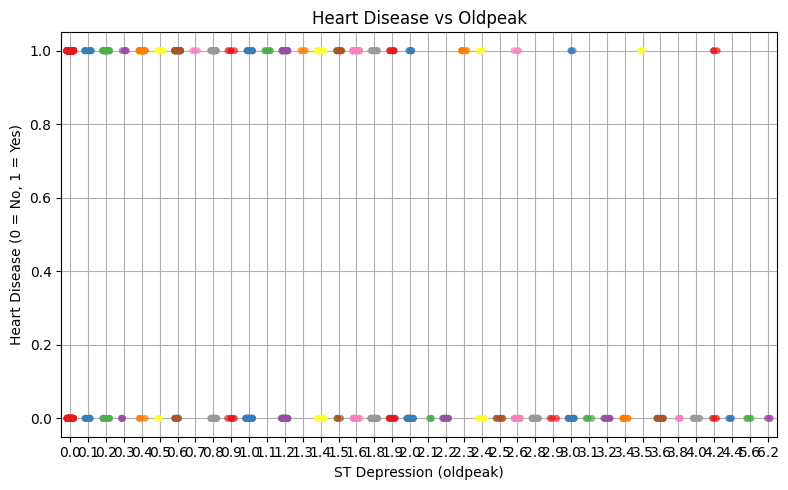

In [26]:
#visual sense of how values of a feature like oldpeak are distributed across the two target classes (0 and 1).

plt.figure(figsize=(8, 5))
sns.stripplot(x=data['oldpeak'], y=data['target'], jitter=0.2, palette='Set1', alpha=0.7)

plt.title("Heart Disease vs Oldpeak")
plt.xlabel("ST Depression (oldpeak)")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()


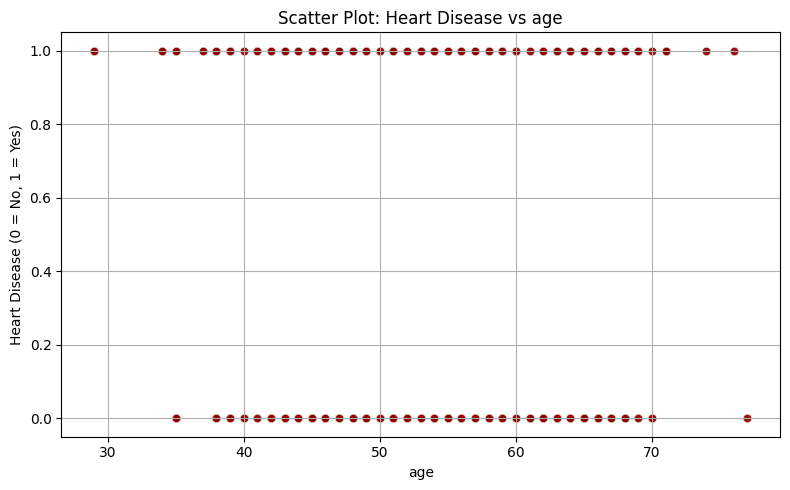

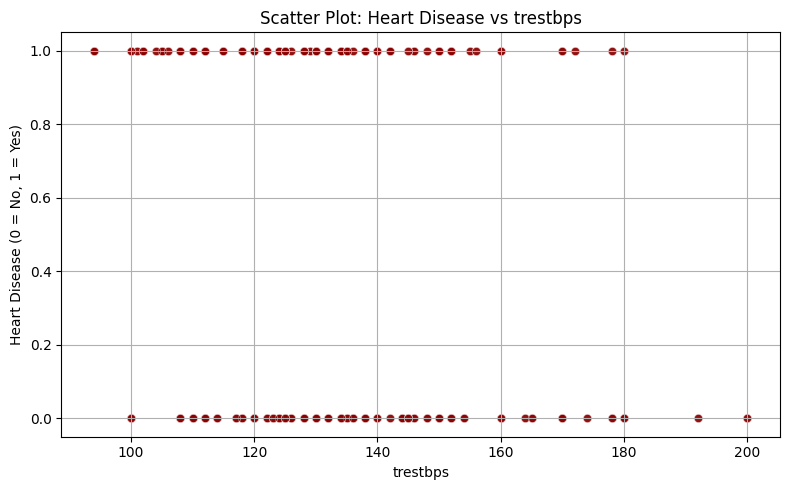

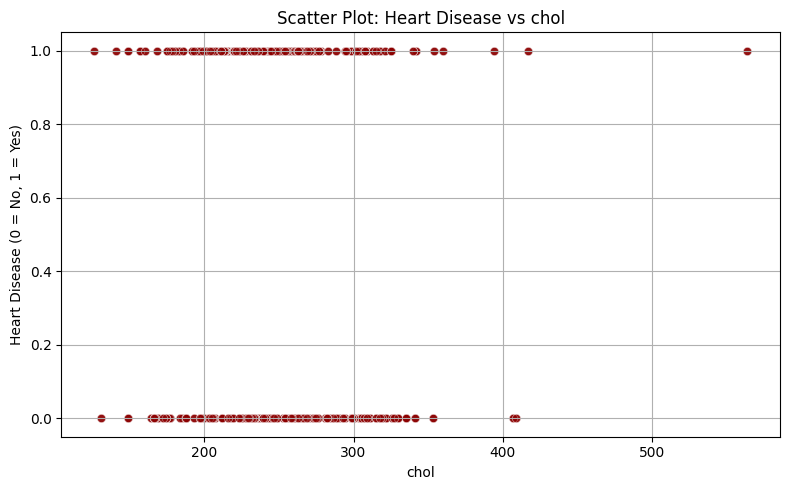

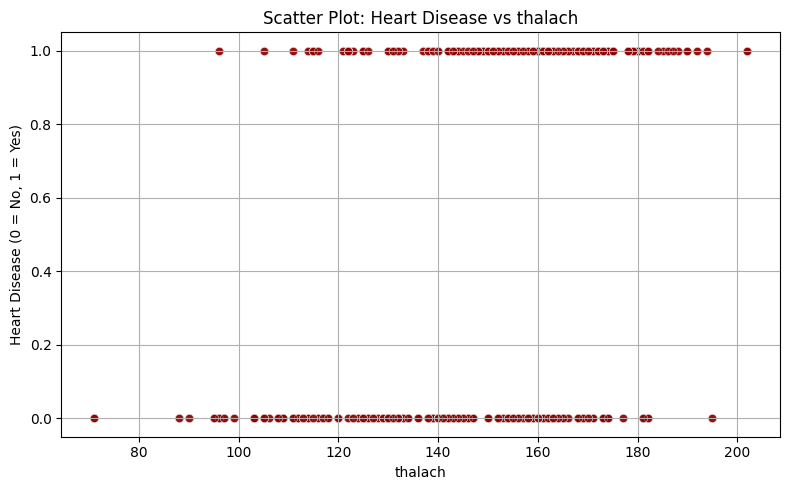

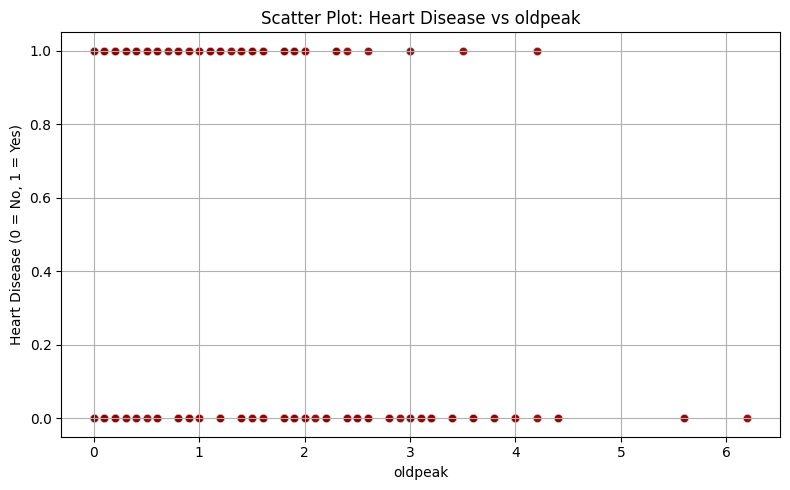

In [36]:

# Loop through each and plot against target
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data['target'], alpha=0.6, color='darkred')
    plt.title(f"Scatter Plot: Heart Disease vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 2: Predict
y_pred = logreg.predict(X_test)

# Step 3: Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8682926829268293

Confusion Matrix:
 [[83 17]
 [10 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       100
           1       0.85      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
# Creating logistic regression model..
base_model = LogisticRegression(max_iter=1000)

# Apply RFE -> select top 10 features
rfe = RFE(estimator=base_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get reduced feature sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [41]:
logreg_rfe = LogisticRegression(max_iter=1000)
logreg_rfe.fit(X_train_rfe, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
y_pred_rfe = logreg_rfe.predict(X_test_rfe)

print("RFE Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_rfe))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfe))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfe))

RFE Logistic Regression Accuracy: 0.8439024390243902

Confusion Matrix:
[[80 20]
 [12 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.82      0.89      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [52]:
base_model = LogisticRegression(max_iter=1000)

# Apply RFE -> select top 10 features
rfe = RFE(estimator=base_model, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Get reduced feature sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logreg_rfe = LogisticRegression(max_iter=1000)
logreg_rfe.fit(X_train_rfe, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
y_pred_rfe = logreg_rfe.predict(X_test_rfe)

print("RFE Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_rfe))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfe))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfe))

RFE Logistic Regression Accuracy: 0.8146341463414634

Confusion Matrix:
[[82 18]
 [20 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.83      0.81      0.82       105

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [ ]:
#now using random forest as it uses random features best

✅ Random Forest Accuracy: 1.0

📊 Confusion Matrix:
[[100   0]
 [  0 105]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



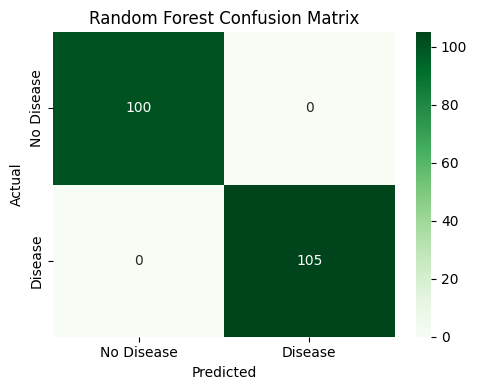

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Optional: Heatmap for Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()